# 0. Install Dependencies and Bring in Data




In [25]:
!pip install tensorflow pandas matplotlib scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import os
import pandas as pd 
import tensorflow as tf
import numpy as np

In [27]:
os.path.join('jigsaw-toxic-comment-classification-challenge,''train.csv')

'jigsaw-toxic-comment-classification-challenge,train.csv'

In [28]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Sonali\Downloads\jigsaw-toxic-comment-classification-challenge\train.csv")
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [29]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [30]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

# 1. Preprocess


In [31]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
aiohappyeyeballs          2.6.1
aiohttp                   3.12.15
aiosignal                 1.4.0
anyio                     4.10.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
certifi                   2025.8.3
cffi                      2.0.0
charset-normalizer        3.4.3
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
datasets                  4.1.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
dill                      0.4.0
executing                 2.2.1
fastjsonschema  

In [32]:
from tensorflow.keras.layers import TextVectorization

In [33]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [34]:
MAX_FEATURES = 200000

In [35]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [36]:
vectorizer.adapt(X.values)

In [37]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [38]:
vectorized_text = vectorizer(X.values)

In [39]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]],
      shape=(159571, 1800))>

In [40]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)


In [41]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [42]:
int(len(dataset)*.7)

6981

In [43]:
train = dataset.take(int(len(dataset) * .7))
val = dataset.skip(int(len(dataset) * .7)).take(int(len(dataset) * .2))
test = dataset.skip(int(len(dataset) * .9)).take(int(len(dataset) * .1))

In [44]:
train_generator = train.as_numpy_iterator()

In [45]:
train_generator.next()

(array([[   2,  145,   61, ...,    0,    0,    0],
        [ 176,    6,  952, ...,    0,    0,    0],
        [   8,   19,  612, ...,    0,    0,    0],
        ...,
        [ 379,    7,  105, ...,    0,    0,    0],
        [ 973,  665,  118, ...,    0,    0,    0],
        [  94,   13, 5602, ...,    0,    0,    0]], shape=(16, 1800)),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

### 3. Create Sequential Model


In [46]:
y[0]

array([0, 0, 0, 0, 0, 0])

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense

MAX_FEATURES = 200000  
EMBEDDING_DIM = 32
OUTPUT_SEQ_LEN = 150   

model = Sequential([
    Input(shape=(OUTPUT_SEQ_LEN,), dtype='int32'),                     
    Embedding(input_dim=MAX_FEATURES + 1, output_dim=EMBEDDING_DIM),    
    Bidirectional(LSTM(32, activation='tanh')),                        
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 150, 32)             │       6,400,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,491,686 (24.76 MB)

 Trainable params: 6,491,686 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2168s 310ms/step - loss: 0.0647 - val_loss: 0.0485
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2212s 317ms/step - loss: 0.0472 - val_loss: 0.0411
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2361s 338ms/step - loss: 0.0421 - val_loss: 0.0373
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2141s 307ms/step - loss: 0.0376 - val_loss: 0.0329
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2140s 307ms/step - loss: 0.0344 - val_loss: 0.0299
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2142s 307ms/step - loss: 0.0307 - val_loss: 0.0279
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2133s 306ms/step - loss: 0.0278 - val_loss: 0.0249
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2131s 305ms/step - loss: 0.0249 - val_loss: 0.0216
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2130s 305ms/step - loss: 0.0228 - val_loss: 0.0200
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2134s 306ms/step - loss: 0.0200 - val_loss: 0.0173


In [ ]:
model.save("final_model.keras")

In [55]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'C++ program', 'checkpoints', 'Copy of Aiml_dateset(2).xlsx', 'Copy of English_memes_dateset(1).xlsx', 'Custom Office Templates', 'desktop.ini', 'history.pkl', 'LTspice', 'MATLAB', 'My Music', 'My Pictures', 'My Videos', 'my_model.h5', 'New folder', 'OneNote Notebooks', 'Python Scripts', 'sonalidhage_marksheet', 'Toxicity-checkpoint.ipynb', 'Toxicity.ipynb', 'Untitled Folder', 'Untitled Folder 1']


In [56]:
history.history

{'loss': [0.06470686197280884,
  0.0471603162586689,
  0.04211675748229027,
  0.03756774216890335,
  0.03435767814517021,
  0.030727388337254524,
  0.02777084894478321,
  0.024858202785253525,
  0.022761134430766106,
  0.020027320832014084],
 'val_loss': [0.04854700341820717,
  0.04106612876057625,
  0.03726833313703537,
  0.0329110361635685,
  0.02988591603934765,
  0.027890289202332497,
  0.02492685802280903,
  0.021613087505102158,
  0.019974632188677788,
  0.017326783388853073]}

In [59]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

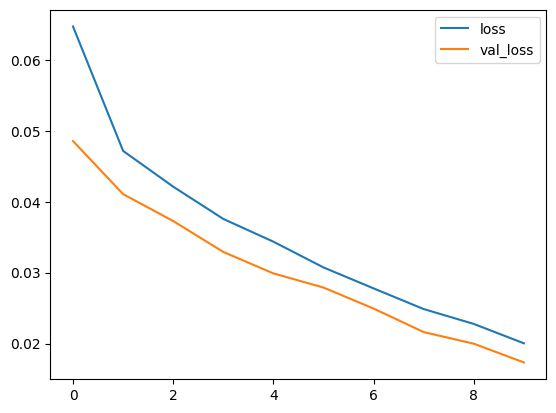

In [60]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## 3. Make Predictions


In [61]:
input_text = vectorizer('You Freaking suck! I am going to hit you,')

In [62]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [67]:
batch = test.as_numpy_iterator().next()

In [69]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [70]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [80]:
res = model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [81]:
16*6

96

In [82]:
res.shape

(16, 6)

In [83]:
res

array([[2.03435663e-02, 1.74586985e-05, 1.48680236e-03, 1.12402675e-04,
        5.56347100e-03, 3.92084214e-04],
       [9.13448036e-02, 4.74343979e-04, 1.36311147e-02, 1.85664627e-03,
        3.17574926e-02, 4.56976052e-03],
       [7.32434215e-03, 1.61339415e-06, 3.28939088e-04, 1.50839978e-05,
        1.60328369e-03, 6.77536373e-05],
       [8.04414228e-03, 2.06603727e-06, 3.80415499e-04, 1.83016200e-05,
        1.81147549e-03, 8.11003265e-05],
       [1.25018686e-01, 1.13526941e-03, 2.29900181e-02, 3.73201980e-03,
        5.07022068e-02, 8.32285546e-03],
       [2.44243965e-02, 2.54594324e-05, 1.93131599e-03, 1.52035631e-04,
        7.18413945e-03, 5.05613105e-04],
       [9.78088602e-02, 5.27856871e-04, 1.47379655e-02, 2.03822902e-03,
        3.41529921e-02, 4.92930785e-03],
       [2.30279118e-02, 2.41698435e-05, 1.81207305e-03, 1.46807215e-04,
        6.52270252e-03, 4.95464425e-04],
       [1.06327692e-02, 3.86299644e-06, 5.71950106e-04, 3.15087600e-05,
        2.51575559e-03, 

## 4. Test and Gradio

In [73]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [74]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [75]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator():
    
x_true, y_true = batch
    
yhat = model.predict(x_true)
    
y_true = y_true.flatten()
yhat = yhat.flatten()
    
pre.update_state(y_true, yhat)
re.update_state(y_true, yhat)
acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━

In [84]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.8336871862411499, Recall: 0.6479647755622864, Accuracy: 0.47943830490112305


## 5. Test And Gradio

In [85]:
!pip install gradio jinja2

   ---------------------------------------- 0.0/60.4 MB ? eta -:--:--
    --------------------------------------- 1.0/60.4 MB 5.6 MB/s eta 0:00:11
   -- ------------------------------------- 3.1/60.4 MB 8.4 MB/s eta 0:00:07
   --- ------------------------------------ 5.2/60.4 MB 9.1 MB/s eta 0:00:07
   ----- ---------------------------------- 7.6/60.4 MB 9.6 MB/s eta 0:00:06
   ------ --------------------------------- 10.0/60.4 MB 10.0 MB/s eta 0:00:06
   ------- -------------------------------- 12.1/60.4 MB 10.3 MB/s eta 0:00:05
   --------- ------------------------------ 14.7/60.4 MB 10.5 MB/s eta 0:00:05
   ----------- ---------------------------- 17.8/60.4 MB 11.0 MB/s eta 0:00:04
   ------------- -------------------------- 20.4/60.4 MB 11.2 MB/s eta 0:00:04
   --------------- ------------------------ 23.3/60.4 MB 11.5 MB/s eta 0:00:04
   ----------------- ---------------------- 26.2/60.4 MB 11.8 MB/s eta 0:00:03
   ------------------- -------------------- 29.6/60.4 MB 12.2 MB/s et


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import tensorflow as tf
import gradio as gr

In [91]:
model.save("toxicity_model.keras")

In [92]:
model = tf.keras.models.load_model("toxicity_model.keras")

In [93]:
input_str = vectorizer('hey I freaken hate you!')

In [95]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [98]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [97]:
res 

array([[0.6891152 , 0.03445738, 0.3376777 , 0.04741206, 0.36517447,
        0.09047964]], dtype=float32)

In [100]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [101]:
def score_comment(comment):
vectorized_comment = vectorizer([comment])
results = model.predict(vectorized_comment)

text = ''
for idx, col in enumerate(df.columns[2:]):
text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
return text

In [117]:
def score_comment(comment):
vectorized_comment = vectorizer([comment])     
results = model.predict(vectorized_comment)

text = ''
for idx, col in enumerate(df.columns[2:]):    
text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
return text
import gradio as gr

interface = gr.Interface(
fn=score_comment,
inputs=gr.Textbox(lines=2, placeholder="Comment to score"),
outputs="text",
title="Toxic Comment Classifier")

In [118]:
interface.launch(share=False)

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
